All needed imports will be established first.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rn

And now we will import the data from the startlearninglabs website and look at the general structure.

In [2]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv"
data = pd.read_csv(fileName)
data.head()

,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
0,BA,9/16/2011,6,0,0,1,0,6,47
1,BA,9/16/2011,7,0,0,1,0,6,47
2,BA,9/16/2011,8,0,0,1,0,6,47
3,BA,9/16/2011,9,0,0,1,0,6,47
4,BA,9/16/2011,10,0,1,0,0,6,47


In [3]:
data.describe()

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
mean,11.504431,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303
std,6.922330,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000
50%,12.000000,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000
75%,18.000000,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000
max,23.000000,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000


GameCode is a categorical variable, lets start by looking at correlation of the other varibales.

In [4]:
data_corr = data[['Hour', 'TablesOcc', 'TablesOpen', 'TablesClosed', 'HeadCount', 'DayOfWeek']].corr()
data_corr

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek
Hour,1.000000,0.150271,0.134911,-0.165562,0.171027,-0.000641
TablesOcc,0.150271,1.000000,0.973488,0.091488,0.932536,0.029641
TablesOpen,0.134911,0.973488,1.000000,0.124094,0.889106,0.031448
TablesClosed,-0.165562,0.091488,0.124094,1.000000,0.043878,-0.038390
HeadCount,0.171027,0.932536,0.889106,0.043878,1.000000,0.031059
DayOfWeek,-0.000641,0.029641,0.031448,-0.038390,0.031059,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text xticklabel objects>)

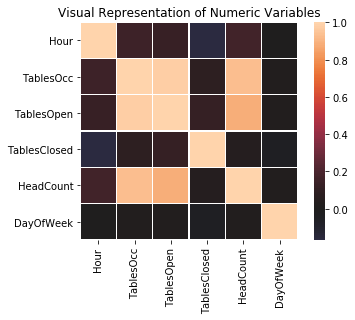

In [5]:
sns.heatmap(data_corr, vmax=1, center=0,
            square=True, linewidths=.25, cbar_kws={"shrink": 1})
plt.title('Visual Representation of Numeric Variables')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

## Correlation Analysis
* Hour and day of week are surprisingly weakly correlated with all the other variables.  Will look into individual days and hours and see if there are deeper correlations.
* Head Count/Tables Open/Tables Occupied highly correlated
* There seem to be a chunk of positive correlations, but few negaive correlations.

I am going to look at these in order. Starting with breaking down the hours and seeing if that brings about any hidden correlations.

Text(0.5,1,'Tables Occupied vs. Tables Open \n with Hour by color')

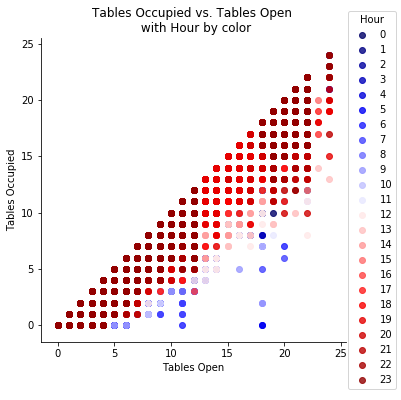

In [6]:
sns.lmplot(x = 'TablesOpen', y = 'TablesOcc', 
           data = data, 
           hue = 'Hour', 
           palette="seismic", 
           fit_reg = False)
plt.xlabel('Tables Open')
plt.ylabel('Tables Occupied')
plt.title('Tables Occupied vs. Tables Open \n with Hour by color')

## Conclusions I can make from this graph
* There is a total of 25 tables in this hall
* It looks like after hour 0, occupied tables goes to zero, insinuating that when it possibly closes.
* At hour 23, occupancy is almost always at 100%.  The fully occupied tables are where tables occupied equals the tables open, or y = x, the diagonal from the origin.
* At the low (possibly early) hours we divert from the efficient frontier and have open tables that are not occupied.


Text(0.5,1,'Tables Occupied vs. Tables Open \n with Hour by color')

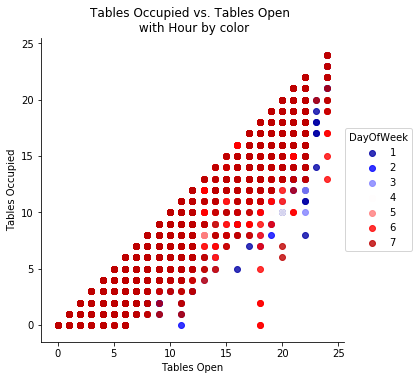

In [7]:
sns.lmplot(x = 'TablesOpen', y = 'TablesOcc', 
           data = data, 
           hue = 'DayOfWeek', 
           palette="seismic", 
           fit_reg = False)
plt.xlabel('Tables Open')
plt.ylabel('Tables Occupied')
plt.title('Tables Occupied vs. Tables Open \n with Hour by color')

## Conclusions I can make from this graph
* We operate near the efficient frontier on day 6 and 7, meaning on the weekends.
* All other days do not operate at full capacity.

Text(0.5,1,'Time series of daily aggregated Headcount')

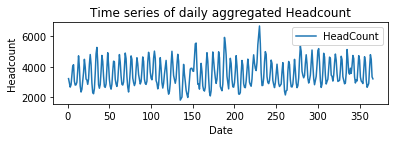

In [8]:
ax = plt.figure(figsize=(6, 1.5)).gca() # define axis
data[['DayNumber', 'HeadCount']].groupby('DayNumber').sum().plot(ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Headcount')
ax.set_title('Time series of daily aggregated Headcount')

## Conclusions I can make from this graph
* There is for sure a cyclical nature on a weekly basis.

Lets quickly do something similar but with day of week.

Text(0,0.5,'Head Count')

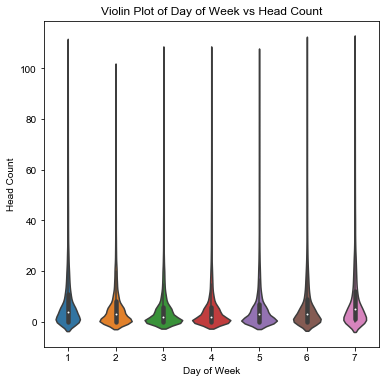

In [9]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
sns.set_style("whitegrid")
sns.violinplot(x = 'DayOfWeek', y = 'HeadCount', data = data, ax = ax)
ax.set_title('Violin Plot of Day of Week vs Head Count')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Head Count')

## Conclusions I can make from this (not very pretty) graph
* Large outliers, the mean for all days are around 5, but all have values 100-115ish.

Perhaps we should be taking into account the GameCode, lets see if that categorical data can bring out some interstin information.

Text(0,0.5,'Head Count')

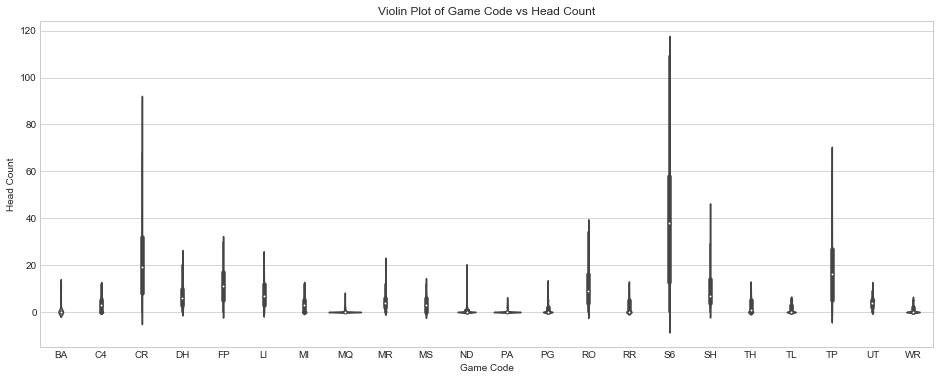

In [10]:
fig = plt.figure(figsize=(16,6))
ax = fig.gca()
sns.set_style("whitegrid")
sns.violinplot(x = 'GameCode', y = 'HeadCount', data = data, ax = ax)
ax.set_title('Violin Plot of Game Code vs Head Count')
ax.set_xlabel('Game Code')
ax.set_ylabel('Head Count')

## Conclusions I can make from this (also not very pretty) graph
Unfortunately, the number of game codes makes the voilin plots lose their voilin features, but we can still look at mean and general distribution of the headcount within the various gamecodes.  We know that, with the exeption of MS (147), BA (118), and MI (8630), all other game codes have 8778 observations.

* CR, S6, and TP have the three largest variations.
* MQ, ND, PA, TL, and WR have vast majorty of observations at zero.

Lets take a look at S6 as it seems to have the most variation for now.

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1534: UserWarning: Warning: converting a masked elemen

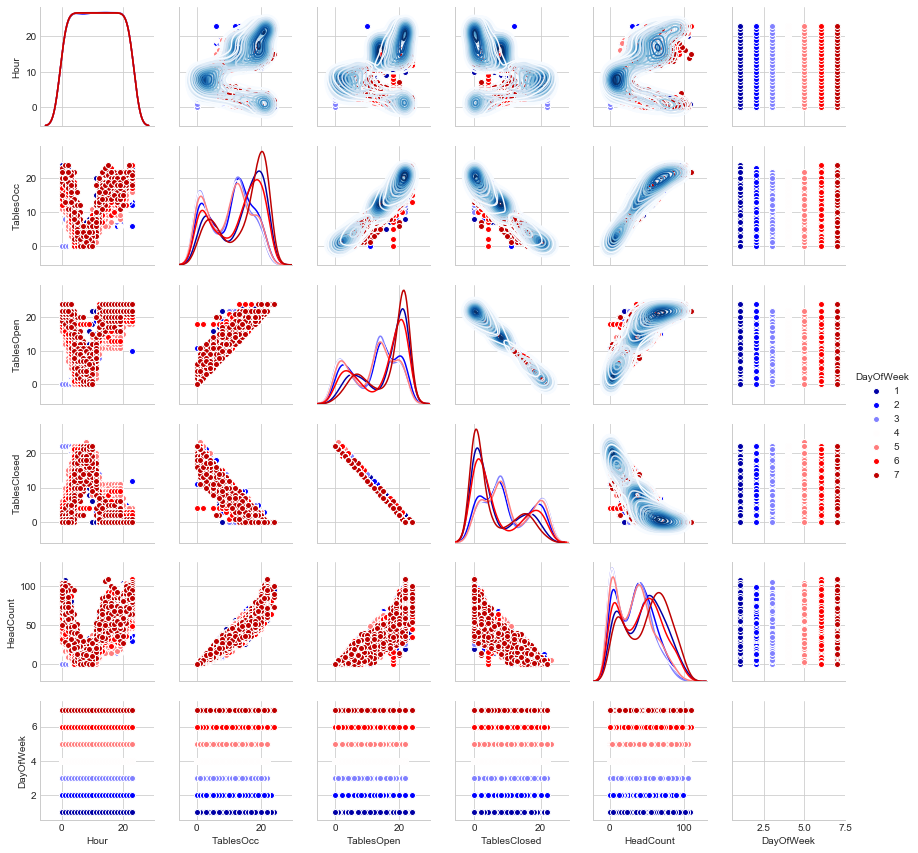

In [11]:
num_cols = ['Hour', 'TablesOcc', 'TablesOpen', 'TablesClosed', 'HeadCount', 'DayOfWeek'] 
sns.pairplot(data.loc[data.loc[:, "GameCode"] == "S6", num_cols], hue='DayOfWeek', 
             palette="seismic", diag_kind="kde", 
             size=2).map_upper(sns.kdeplot, cmap="Blues")

Oh my, there are a ton of data points.  This is a tough graph to read and interpret especialy the countour maps as there are some strong clusters that seem to overlap.

## Some conclusions I can make from looking at the S6 game code.
* It seems the people in this group work in the tail ends of the hour plot, ie, hour 5-7 looks very low, but picks up around that.
* There are people there all days of the week in a similar frequency.
* Daily distributions are fairly similar, unlike what we observed above.  This may be due to too many observations that python had to decide which to put on (what we described above as) the effiecient frontier.
* The more tables occupied, the higher the head count.

I am going to try to get some better look at hours, I am going to group hours to be: 0 - 5 : Night, 6 - 12 : Morning, 13 - 18 : Afternoon, 19 - 23 : Evening

I am also going to (possibly commit a taboo) and sample the data a little to see if we can get clearer information.

In [12]:
data["AggHours"] = "0"
data.loc[ data.loc[:, "Hour"].between(0, 5, inclusive = True), "AggHours"] = "Night"
data.loc[ data.loc[:, "Hour"].between(6, 12, inclusive = True), "AggHours"] = "Morning"
data.loc[ data.loc[:, "Hour"].between(13, 18, inclusive = True), "AggHours"] = "Afternoon"
data.loc[ data.loc[:, "Hour"].between(19, 23, inclusive = True), "AggHours"] = "Evening"

S6_SubData = data.loc [data.loc[:, "GameCode"] == "S6", :]

S6_sample = rn.sample(range(len(S6_SubData)), 500)  
# I tested a few iterations and I like the 500 count

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


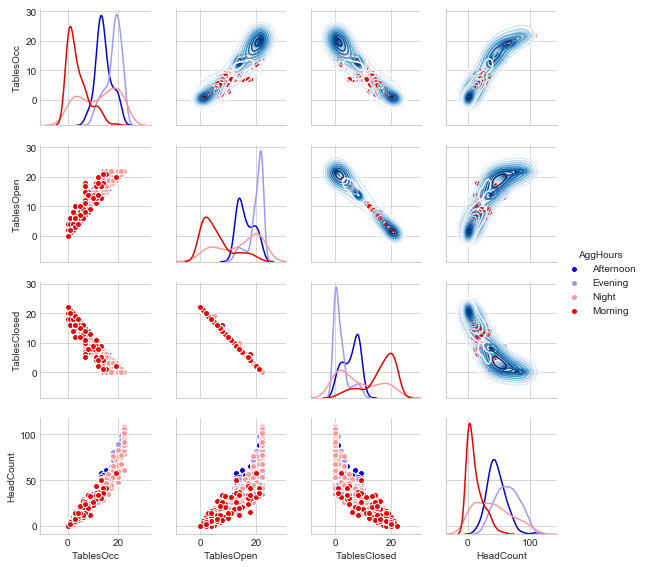

In [31]:
num_cols = ['AggHours', 'TablesOcc', 'TablesOpen', 'TablesClosed', 'HeadCount'] 
sns.pairplot(S6_SubData.iloc[S6_sample, :].loc[:, num_cols], hue='AggHours', 
             palette="seismic", diag_kind="kde", 
             size=2).map_upper(sns.kdeplot, cmap="Blues")

## Conclusions I can make from this (much cleaner) graph
* For those in this gamecode (S6), the most frequent headcount in the Morning is zero.
* When there are the most tables open, it is usually in the evening (one in afternoon).
* There are large clusers around 0 headcount, this must mean that these are only used during specific time during the day.
* Night has a bimodal occupancy rate.